# Online Store A/B Testing and Analysis

Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue for the online store. We have prioritized the hypotheses, launched an A/B test, and analyzed the results.

#### Description of the data
`Hypotheses` — brief descriptions of the hypotheses<br>
-*Reach* — user reach, on a scale of one to ten<br>
-*Impact* — impact on users, on a scale of one to ten<br>
-*Confidence* — confidence in the hypothesis, on a scale of one to ten<br>
-*Effort* — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.<br>

`Orders` — brief descriptions of the orders<br>
-*transactionId* — order identifier<br>
-*visitorId* — identifier of the user who placed the order<br>
-*date* — of the order<br>
-*revenue* — from the order<br>
-*group* — the A/B test group that the user belongs to<br>

`Visits` — brief descriptions of the visits<br>
-*date* — date<br>
-*group* — A/B test group<br>
-*visits* — the number of visits on the date specified in the A/B test group specified<br>

### Data Preprocessing

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', None)

In [2]:
hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
hypothesis.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [5]:
hypothesis.duplicated().sum()

0

In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders = orders.rename(columns= {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [8]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1197 non-null   int64  
 1   visitor_id      1197 non-null   int64  
 2   date            1197 non-null   object 
 3   revenue         1197 non-null   float64
 4   group           1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = pd.to_datetime(orders['date'], dayfirst=True)

In [11]:
orders.isnull().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
 visits = pd.read_csv('/datasets/visits_us.csv')

In [14]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visits['date'] = pd.to_datetime(visits['date'], dayfirst=True)

In [17]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [18]:
visits.duplicated().sum()

0

### Hypothesis Prioritization

In [19]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [20]:
#applying ICE test = (impact x confidence) / effort
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Effort']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


#### According to the ICE scale, hypotheis 8, 0 7, and 6 should be prioritized.

In [21]:
#applying the RICE score = (reach x impact x confidence) / effort
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Effort']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


#### According to the RICE method, hypotheis 7,2,0, and 6 should be prioritized. The prioritization of the hypothesis changes using the RICE method due the reach parameter being higher (reach=10 for hypothesis 7 while reach=1 for hypothesis). In this case, since the reach is higher for hypothesis 7, we should prioritize this first.

### A/B Test Analysis

In [22]:
#confirming the number of groups for A/B test
orders['group'].nunique()

2

#### There are two groups (A and B).

In [23]:
#confirming start date of test
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
#confirming end date of test 
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

#### The test lasts one month from 8/1 through 8/31

In [25]:
#checking the total number of users per groups
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

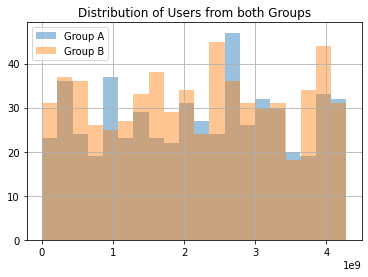

In [26]:
orders[orders['group'] == 'A']['visitor_id'].hist(bins=20, alpha=0.45)
orders[orders['group'] == 'B']['visitor_id'].hist(bins=20, alpha=0.45)
plt.legend(['Group A', 'Group B'])
plt.title('Distribution of Users from both Groups');

#### We can confirm that there are more users in Group B than A. We will try to see which users may overlap in both groups.

In [27]:
#finding users that may be present in both groups 
visitorIdsByUsersA = orders[orders['group'] == 'A']['visitor_id'].unique()
visitorIdsByUsersB = orders[orders['group'] == 'B']['visitor_id'].unique()
users_to_remove = set(visitorIdsByUsersA ) & set(visitorIdsByUsersB)
users_to_remove

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

In [28]:
len(users_to_remove)

58

#### There are 58 users present in both groups. We must get rid of the duplicates.

In [29]:
#dropping/ removing the rows with visitors that are present in both groups 
orders = orders[~orders['visitor_id'].isin(users_to_remove)]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [30]:
#new number of sample per groups after dropping users present in both groups 
orders.groupby('group')['visitor_id'].nunique()

group
A    445
B    528
Name: visitor_id, dtype: int64

In [31]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [32]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [33]:
# getting aggregated cumulative daily data on visitors  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])] \
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
    .sort_values(by=['date','group'])
visitsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [34]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [35]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
print(cumulativeRevenueA.head())
print()
print(cumulativeRevenueB.head())

        date  revenue  orders
0 2019-08-01   2266.6      23
2 2019-08-02   3734.9      42
4 2019-08-03   5550.1      66
6 2019-08-04   6225.6      77
8 2019-08-05   7623.6      99

        date  revenue  orders
1 2019-08-01    967.2      17
3 2019-08-02   3535.3      40
5 2019-08-03   4606.9      54
7 2019-08-04   6138.5      68
9 2019-08-05   7587.8      89


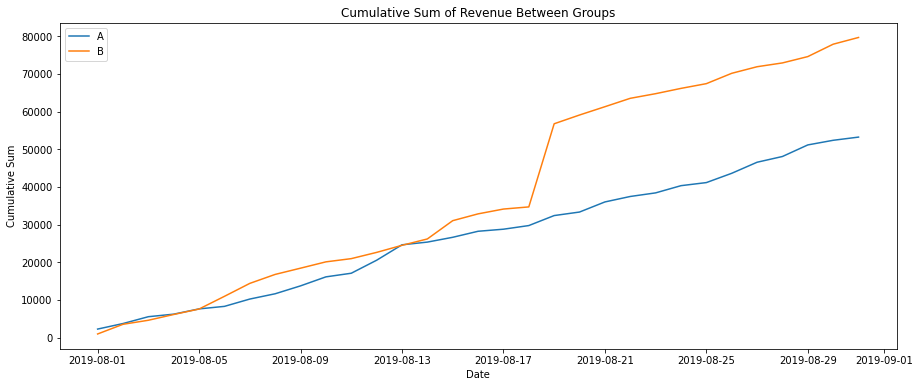

In [36]:
#graphing the cumulative revenue by group
plt.figure(figsize=(15,6))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Revenue Between Groups')
plt.legend();


#### It looks like group B overall has a higher cumulative revenue.

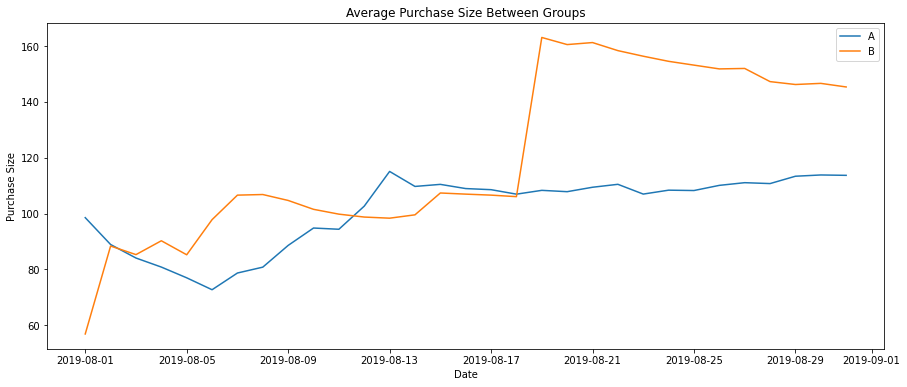

In [37]:
#plotting cumulative average order size by group 
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Date')
plt.ylabel('Purchase Size')
plt.title('Average Purchase Size Between Groups')
plt.legend();

#### We can see that the average purchase size for group B was converse group A around the 6th of August. Group B also had a spike around the 18th while group A plateau'd. 

In [38]:
#calculating the relative difference
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(10)


,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89
5,2019-08-06,8292.0,114,10957.1,112
6,2019-08-07,10234.0,130,14392.7,135
7,2019-08-08,11638.8,144,16772.6,157
8,2019-08-09,13734.0,155,18428.8,176
9,2019-08-10,16121.5,170,20103.6,198


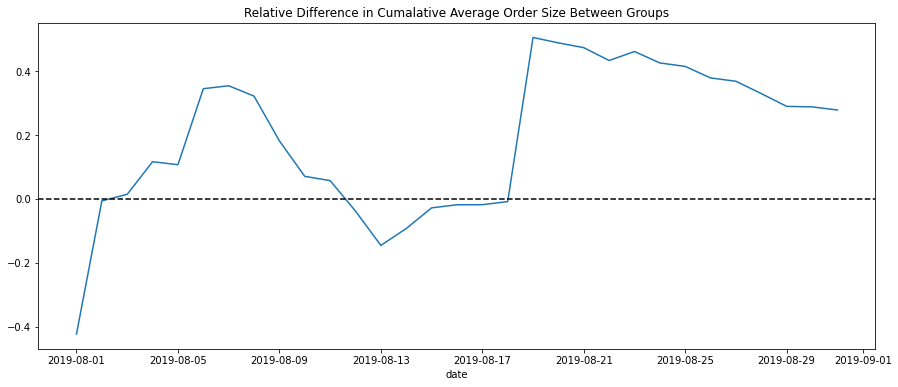

In [39]:
#Graph the relative difference in cumulative average order size for group B compared with group A.
# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative Difference in Cumalative Average Order Size Between Groups')
plt.xlabel('date')
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

#### The segments spikes a few times and dip. There may be some outliers or large order sizes. 

In [40]:
#Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

print(cumulativeDataA.head())
print()
print(cumulativeDataB.head())

        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      23      19   2266.6       719    0.031989
2 2019-08-02     A      42      36   3734.9      1338    0.031390
4 2019-08-03     A      66      60   5550.1      1845    0.035772
6 2019-08-04     A      77      71   6225.6      2562    0.030055
8 2019-08-05     A      99      92   7623.6      3318    0.029837

        date group  orders  buyers  revenue  visitors  conversion
1 2019-08-01     B      17      17    967.2       713    0.023843
3 2019-08-02     B      40      39   3535.3      1294    0.030912
5 2019-08-03     B      54      53   4606.9      1803    0.029950
7 2019-08-04     B      68      66   6138.5      2573    0.026428
9 2019-08-05     B      89      87   7587.8      3280    0.027134


In [41]:
#finding the max date to graph x axis
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

In [42]:
#finding the min date to graph x axis
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [43]:
#finding the max conversion to graph y axis
cumulativeData['conversion'].max()

0.03577235772357724

In [44]:
#finding the min conversion to graph y axis
cumulativeData['conversion'].min()

0.023842917251051893

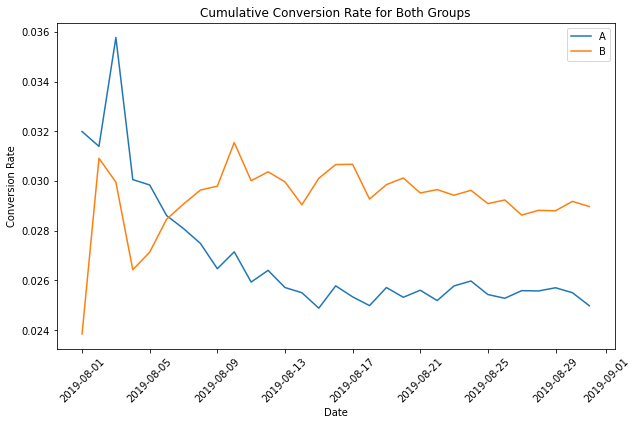

In [45]:

# plotting the graphs
plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative Conversion Rate for Both Groups')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45);

#### For both groups, there was a spike in the conversion, however group A was higher than group B initially. Meanwhile, group A's conversion dropped over the course of about two weeks then gets close to stablizing before it drops again. Group A had a second high spike and starts to slightly dip and stabilize. 

In [46]:
#putting conversion rates of both groups in one table
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


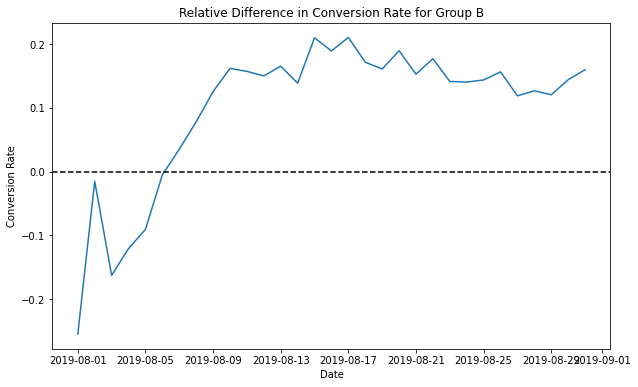

In [47]:
#plotting the relative difference in conversion rates
plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference in Conversion Rate for Group B')
plt.ylabel('Conversion Rate')
plt.xlabel('Date');

#### It seems that group B stuggled during the first part of the test, then suddenly took the lead. 

In [48]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [49]:
#calculating number of orders per user for both groups 
#dropping some columns and grouping by visitor_id
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['visitor_id', 'n_orders']

ordersByUsers.sort_values(by='n_orders', ascending=False).head(10)

,visitor_id,n_orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


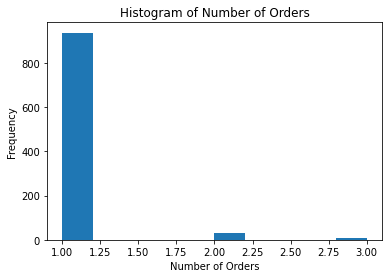

In [50]:
#plotting histogram of number of orders 
plt.hist(ordersByUsers['n_orders'])
plt.title('Histogram of Number of Orders')
plt.ylabel('Frequency')
plt.xlabel('Number of Orders');

#### The majority of people placed one order. A good amount placed 2 orders, however, we cannot conclude if they are anomolies or not.

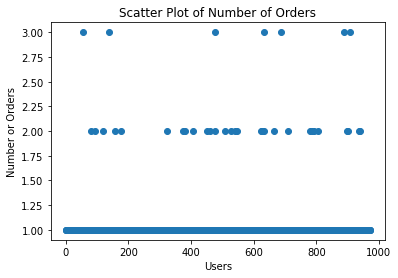

In [51]:
#plotting a scatter plot to look at number of orders per user
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['n_orders'])
plt.title('Scatter Plot of Number of Orders')
plt.ylabel('Number or Orders')
plt.xlabel('Users');

#### We can conclude that the majority ordered placed 1 order and a good amount did place 2 orders. We still cannot conclude if 2 orders or above should be an anomoly, but we can say that 3 orders is an anomoly. 

In [52]:
#calculating the percentiles for the number of orders per user
np.percentile(ordersByUsers['n_orders'], [90, 95, 99])

array([1., 1., 2.])

#### We can say that no more than 5% placed more than 1 order and no more than 1% placed more than 2 orders. It would be reasonable to set 1 order per user as the lower limit for the number of orders and to filter anomalies on that basis

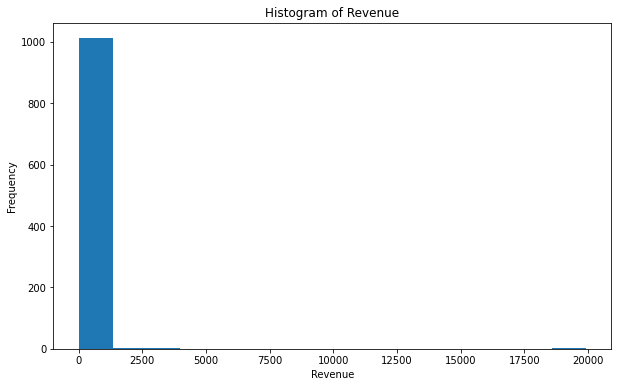

In [53]:
#plotting a histogram of revenue
plt.figure(figsize=(10,6))
plt.hist(orders['revenue'], bins=15)
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.title('Histogram of Revenue');

##### It looks like the majority of revenue is less than \\$1500. There were some orders that cost more, one even about \\$180,000, but the orders were much smaller.

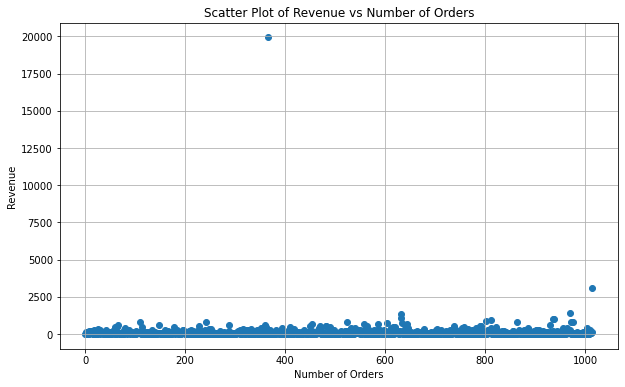

In [54]:
#using scatter plot to evaluate revenue 
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Revenue')
plt.xlabel('Number of Orders')
plt.title('Scatter Plot of Revenue vs Number of Orders')
plt.grid(visible=True);

#### The majority of orders are below \\$1500. Based on this graph we can set the abnormal limit to above \\$1500. 

In [55]:
#Calculate the 95th and 99th percentiles of order prices
np.percentile(orders['revenue'], [95, 97.5, 99])

array([414.275, 578.75 , 830.3  ])

#### No more than 5% of the orders cost more than \\$578.75, and no more than 1% of the orders cost more than \\$830. Orders greater than \\$830 become the anomoly.


### Find the statistical significance of the difference in conversion between the groups using the raw data

Null Hypothesis: There is no difference between the two groups.<br>
Alternative Hypothesis: There is a statistical significance between the two groups.

In [56]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [57]:
#creating the variables ordersByUsersA and ordersByUsersB
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

print(ordersByUsersA.head())
print()
print(ordersByUsersB.head())


   visitor_id  orders
0    11685486       1
1    54447517       1
2    66685450       1
3    78758296       1
4    85103373       1

   visitor_id  orders
0     5114589       1
1     6958315       1
2    39475350       1
3    47206413       1
4    48147722       1


In [58]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [59]:
#declaring sample groups A and B, with those who didn't order anything will have 0
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [60]:
#calculating the statistical significance between the two groups
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.01102
0.160


#### Since the p-value is lower than 0.05, we can reject the null hypothesis. The raw data analysis of the two groups conversion rates are statistically significant. The relative difference between the groups os 16% 

### Finding the statistical significance of the difference in average order size between the groups using the raw data

In [61]:
#applying the mannwhitney criterion 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

#calculating the relative difference between average order size between groups
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.862
0.278


#### The p-value is significantly higher than 0.05, so there are no statistically significant differences between the average order size between the groups. The relative difference between the groups is 27.8%.

### Find the statistical significance of the difference in conversion between the groups using the filtered data

In [62]:
#defining anomalous users, making data slices for different users 
#users with orders 2 or more 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitor_id']], axis = 0)

#users who spent more than 1500 
usersWithExpensiveOrders = orders[orders['revenue'] > 1500]['visitor_id']

#combining the two to make abnormal users
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

33    249864742
36    366673373
51    406208401
67    522292794
58    611059232
Name: visitor_id, dtype: int64

In [63]:
#finding the total number of anomolous users
abnormalUsers.shape

(38,)

##### There are a total of 38 anomalous users. 

In [64]:
#Removing the anomalous visitors (filtering data)
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'] \
    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'] \
    .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'] \
    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'] \
    .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [65]:
#applying mann-whitney test
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.178


#### The p-value is less than 0.05, so there is a statistical significance between the two filtered groups. The relative difference is 17.8%. It seems that group B is better than group A. 

### Finding the statistical significance of the difference in average order size between the groups using the filtered data

In [66]:
#removing anomolous orders
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.850
-0.066


#### The p-value is about the same for the raw data for the conversion (there is no statistical significance), but now the difference is 6% instead of 27.8%. 

### Conclusion: <br>
<br>
The conversion rate for the raw data and filtered data revealed statistical significance. 
<br>
The average order size for the raw data and filtered data revealed no significance. 
<br>
The graph for group B's conversion rate seems to be doing well. 
<br>
The graph for the relative difference in average order size shows a big difference as group B is higher. 
<br>
I would recommend to stop the test as there is a statistical significance in the conversion rate between the groups. It seems that group B's average order size and conversion rate is better than group A. Since there are concrete changes between the groups this far into the test, we can stop the test and conclude that there is a statistical signicance between the two groups overall. 